In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

from keras.applications.vgg19 import VGG19,preprocess_input, decode_predictions

In [3]:
train_datagen = ImageDataGenerator(zoom_range= 0.5, shear_range= 0.3, rescale= 1/255, horizontal_flip= True, preprocessing_function= preprocess_input)
val_datagen= ImageDataGenerator(preprocessing_function=preprocess_input)


In [5]:
train= train_datagen.flow_from_directory(directory= "cropdataset/crop disease wise", target_size= (256,256), batch_size=32)

val= val_datagen.flow_from_directory(directory= "cropdataset/crop disease wise", target_size= (256,256), batch_size=32)


Found 54305 images belonging to 38 classes.
Found 54305 images belonging to 38 classes.


In [6]:
t_img, label= train.next()
t_img.shape

(32, 256, 256, 3)

In [7]:
def plotImage(imgarr, label):
    for im,l in zip(imgarr, label):
        plt.figure(figsize=(5,5))
        plt.imshow(im*100)
        plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


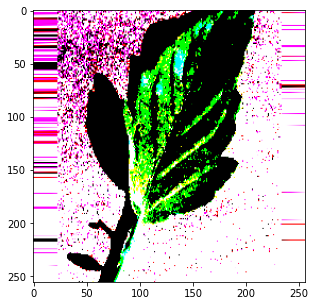

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


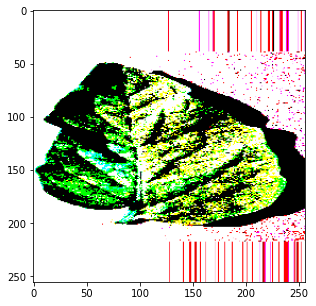

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


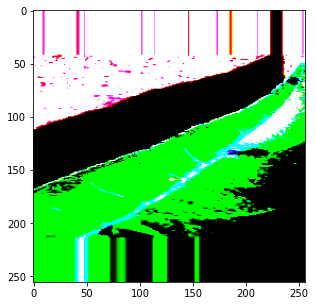

In [8]:
plotImage(t_img[:3], label[:3])

In [9]:
from keras.layers import Dense,Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [75]:
base_model= VGG19(input_shape=(256,256,3), include_top= False)

In [76]:
for layer in base_model.layers:
    layer.trainable= False

In [77]:
x= Flatten()(base_model.output)
x=Dense(units= 38, activation='softmax')(x)

model= Model(base_model.input,x)
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [78]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es=EarlyStopping(monitor= 'val_accuracy',min_delta=0.01, patience=3, verbose=1)
mc= ModelCheckpoint(filepath="new_best_model50.h5",monitor= 'val_accuracy',min_delta=0.01, patience=3, verbose=1, save_best_only= True)
cb=[es,mc]


In [79]:
his= model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks= cb,validation_data= val, validation_steps=16)

C:\Users\ADMIN\AppData\Local\Temp/ipykernel_1408/3149945495.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his= model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks= cb,validation_data= val, validation_steps=16)


Epoch 1/50


InvalidArgumentError: Graph execution error:

Detected at node 'categorical_crossentropy/softmax_cross_entropy_with_logits' defined at (most recent call last):
    File "C:\Users\ADMIN\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\ADMIN\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\ADMIN\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\ADMIN\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\ADMIN\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\ADMIN\AppData\Local\Temp/ipykernel_1408/3149945495.py", line 1, in <module>
      his= model.fit_generator(train, steps_per_epoch=16, epochs=50, verbose=1, callbacks= cb,validation_data= val, validation_steps=16)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\training.py", line 2209, in fit_generator
      return self.fit(
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in train_step
      loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\training.py", line 918, in compute_loss
      return self.compiled_loss(
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\losses.py", line 141, in __call__
      losses = call_fn(y_true, y_pred)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\losses.py", line 245, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\losses.py", line 1789, in categorical_crossentropy
      return backend.categorical_crossentropy(
    File "C:\Users\ADMIN\anaconda3\lib\site-packages\keras\backend.py", line 5098, in categorical_crossentropy
      return tf.nn.softmax_cross_entropy_with_logits(
Node: 'categorical_crossentropy/softmax_cross_entropy_with_logits'
logits and labels must be broadcastable: logits_size=[32,38] labels_size=[32,12]
	 [[{{node categorical_crossentropy/softmax_cross_entropy_with_logits}}]] [Op:__inference_train_function_8599]

In [21]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

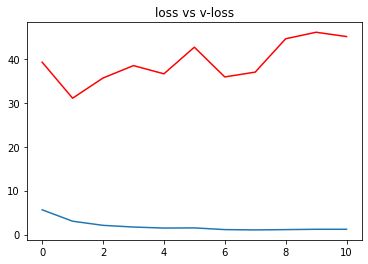

In [22]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c='red')
plt.title('loss vs v-loss')
plt.show()

In [32]:
from keras.models import load_model
model= load_model("best_model50.h5")
dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [51]:
def prediction(path):
    img=load_img(path, target_size=(256,256))
    i=img_to_array(img)
    im=preprocess_input(i)
    img= np.expand_dims(im, axis=0)
    pred= np.argmax(model.predict(img))
    if(pred==7):
        print("This is Corn gray leaf spot disease. A one-year rotation away from corn, followed by tillage is recommended to prevent disease development in the subsequent corn crop. In no-till or reduced-till fields with a history of gray leaf spot, a two-year rotation out of corn may be needed to reduce the amount of disease in the following corn crop.")
    elif(pred==8):
        print("This is Corn common rust disease. To reduce the incidence of corn rust, plant only corn that has resistance to the fungus. Resistance is either in the form of race-specific resistance or partial rust resistance. In either case, no sweet corn is completely resistant. If the corn begins to show symptoms of infection, immediately spray with a fungicide. The fungicide is most effective when startedat the first sign of infection.")
    elif(pred==11):
        print("This is Grape Black rot disease. Sanitation is extremely important. Destroy mummies, remove diseased tendrils from the wires, and select fruiting canes without lesions. It is very important not to leave mummies attached to the vine.Plant grapes in sunny open areas that allow good air movement. If your vines are planted under trees in the shade where they do not get all day sunlight, black rot will be much more difficult to control. Shaded areas keep the leaves and fruits from drying and provide excellent conditions for black rot infection and disease development.")
    elif(pred==15):
        print("This is Orange cirtus greening disease. One of the most effective ways to prevent the disease is to avoid moving plants and plant materials from areas under regulatory quarantine or where the insect or disease is present.To avoid or minimize the impact of the disease, use an integrated approach: use only certified-clean plantstock; monitor plants regularly to detect and control any population of Asian citrus psyllid; if you suspect HLB, send a sample of the foliage to the appropriate diagnostic laboratory; and remove and destroy trees that are confirmed infected with HLB.")
    elif(pred==16):
        print("This is Peach Bacterial spot disease. This disease is difficult to control, and chemical sprays are not practical for the home gardener. Varieties are available that are moderately resistant but not immune. These varieties are ‘Ambergem’, ‘Belle of Georgia’, ‘Cardinal’, ‘Cherryred’, ‘Dixired’, ‘Candor,’ ‘Challenger’, ‘Carolina Gold’, ‘Norman,’ ‘Loring,’ ‘Bisco’, ‘Southhaven’, and ‘Red Haven’ in a yellow peach, and ‘Southern Pearl’, ‘White County’, and ‘White River’ in a white peach. Bacterial spot is usually more severe on poorly nourished trees or where nematodes are a problem, so proper cultural care is important.")
    elif(pred==28):
        print("This is Tomato Bacterial spot disease. The most effective management strategy is the use of pathogen-free certified seeds and disease-free transplants to prevent the introduction of the pathogen into greenhouses and field production areas. Eliminate solanaceous weeds in and around tomato production areas. Keep cull piles away from field operations. Do not spray, tie, harvest, or handle wet plants as that can spread the disease.")
    elif(pred==32):
        print("This is Tomato septoria leaf spot disease. Remove diseased leaves. Improve air circulation around the plants. Mulch around the base of the plants.Do not use overhead watering. Control weeds.Use crop rotation. Apply chlorothalonil, maneb, macozeb, or a copper-based fungicide, such as Bordeaux mixture, copper hydroxide, copper sulfate, or copper oxychloride sulfate.")
    elif(pred==20):
        print("This is Potato Early Blight disease. Treatment of early blight includes prevention by planting potato varieties that are resistant to the disease; late maturing are more resistant than early maturing varieties. Avoid overhead irrigation and allow for sufficient aeration between plants to allow the foliage to dry as quickly as possible.")

In [53]:
path="tomato_leafmold.JPG"
prediction(path)

32
This is Tomato septoria leaf spot disease. Remove diseased leaves. Improve air circulation around the plants. Mulch around the base of the plants.Do not use overhead watering. Control weeds.Use crop rotation. Apply chlorothalonil, maneb, macozeb, or a copper-based fungicide, such as Bordeaux mixture, copper hydroxide, copper sulfate, or copper oxychloride sulfate.
